# Code to create the plots for the poster
Try it out online with a Binder environement! 

Import all the packages you'll need

In [2]:
%%capture
%load_ext autoreload
%autoreload 2
from antarctic_plots import maps, fetch, regions, profile, utils

## Fetch

```python
fetch.bedmap2(layer="icebase")
```

In [10]:
fetch.bedmap2(layer="icebase")

<xarray.DataArray 'z' (y: 560, x: 560)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * x        (x) float64 -2.795e+06 -2.785e+06 ... 2.785e+06 2.795e+06
  * y        (y) float64 -2.795e+06 -2.785e+06 ... 2.785e+06 2.795e+06

## Download and plot BedMachine data

c:\Users\matthewt\AppData\Local\miniforge3\envs\antarctic_plots_interactive\lib\site-packages\xarray\backends\plugins.py:64: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


plot region is: [1530000.0, 2460000.0, 430000.0, 1000000.0]


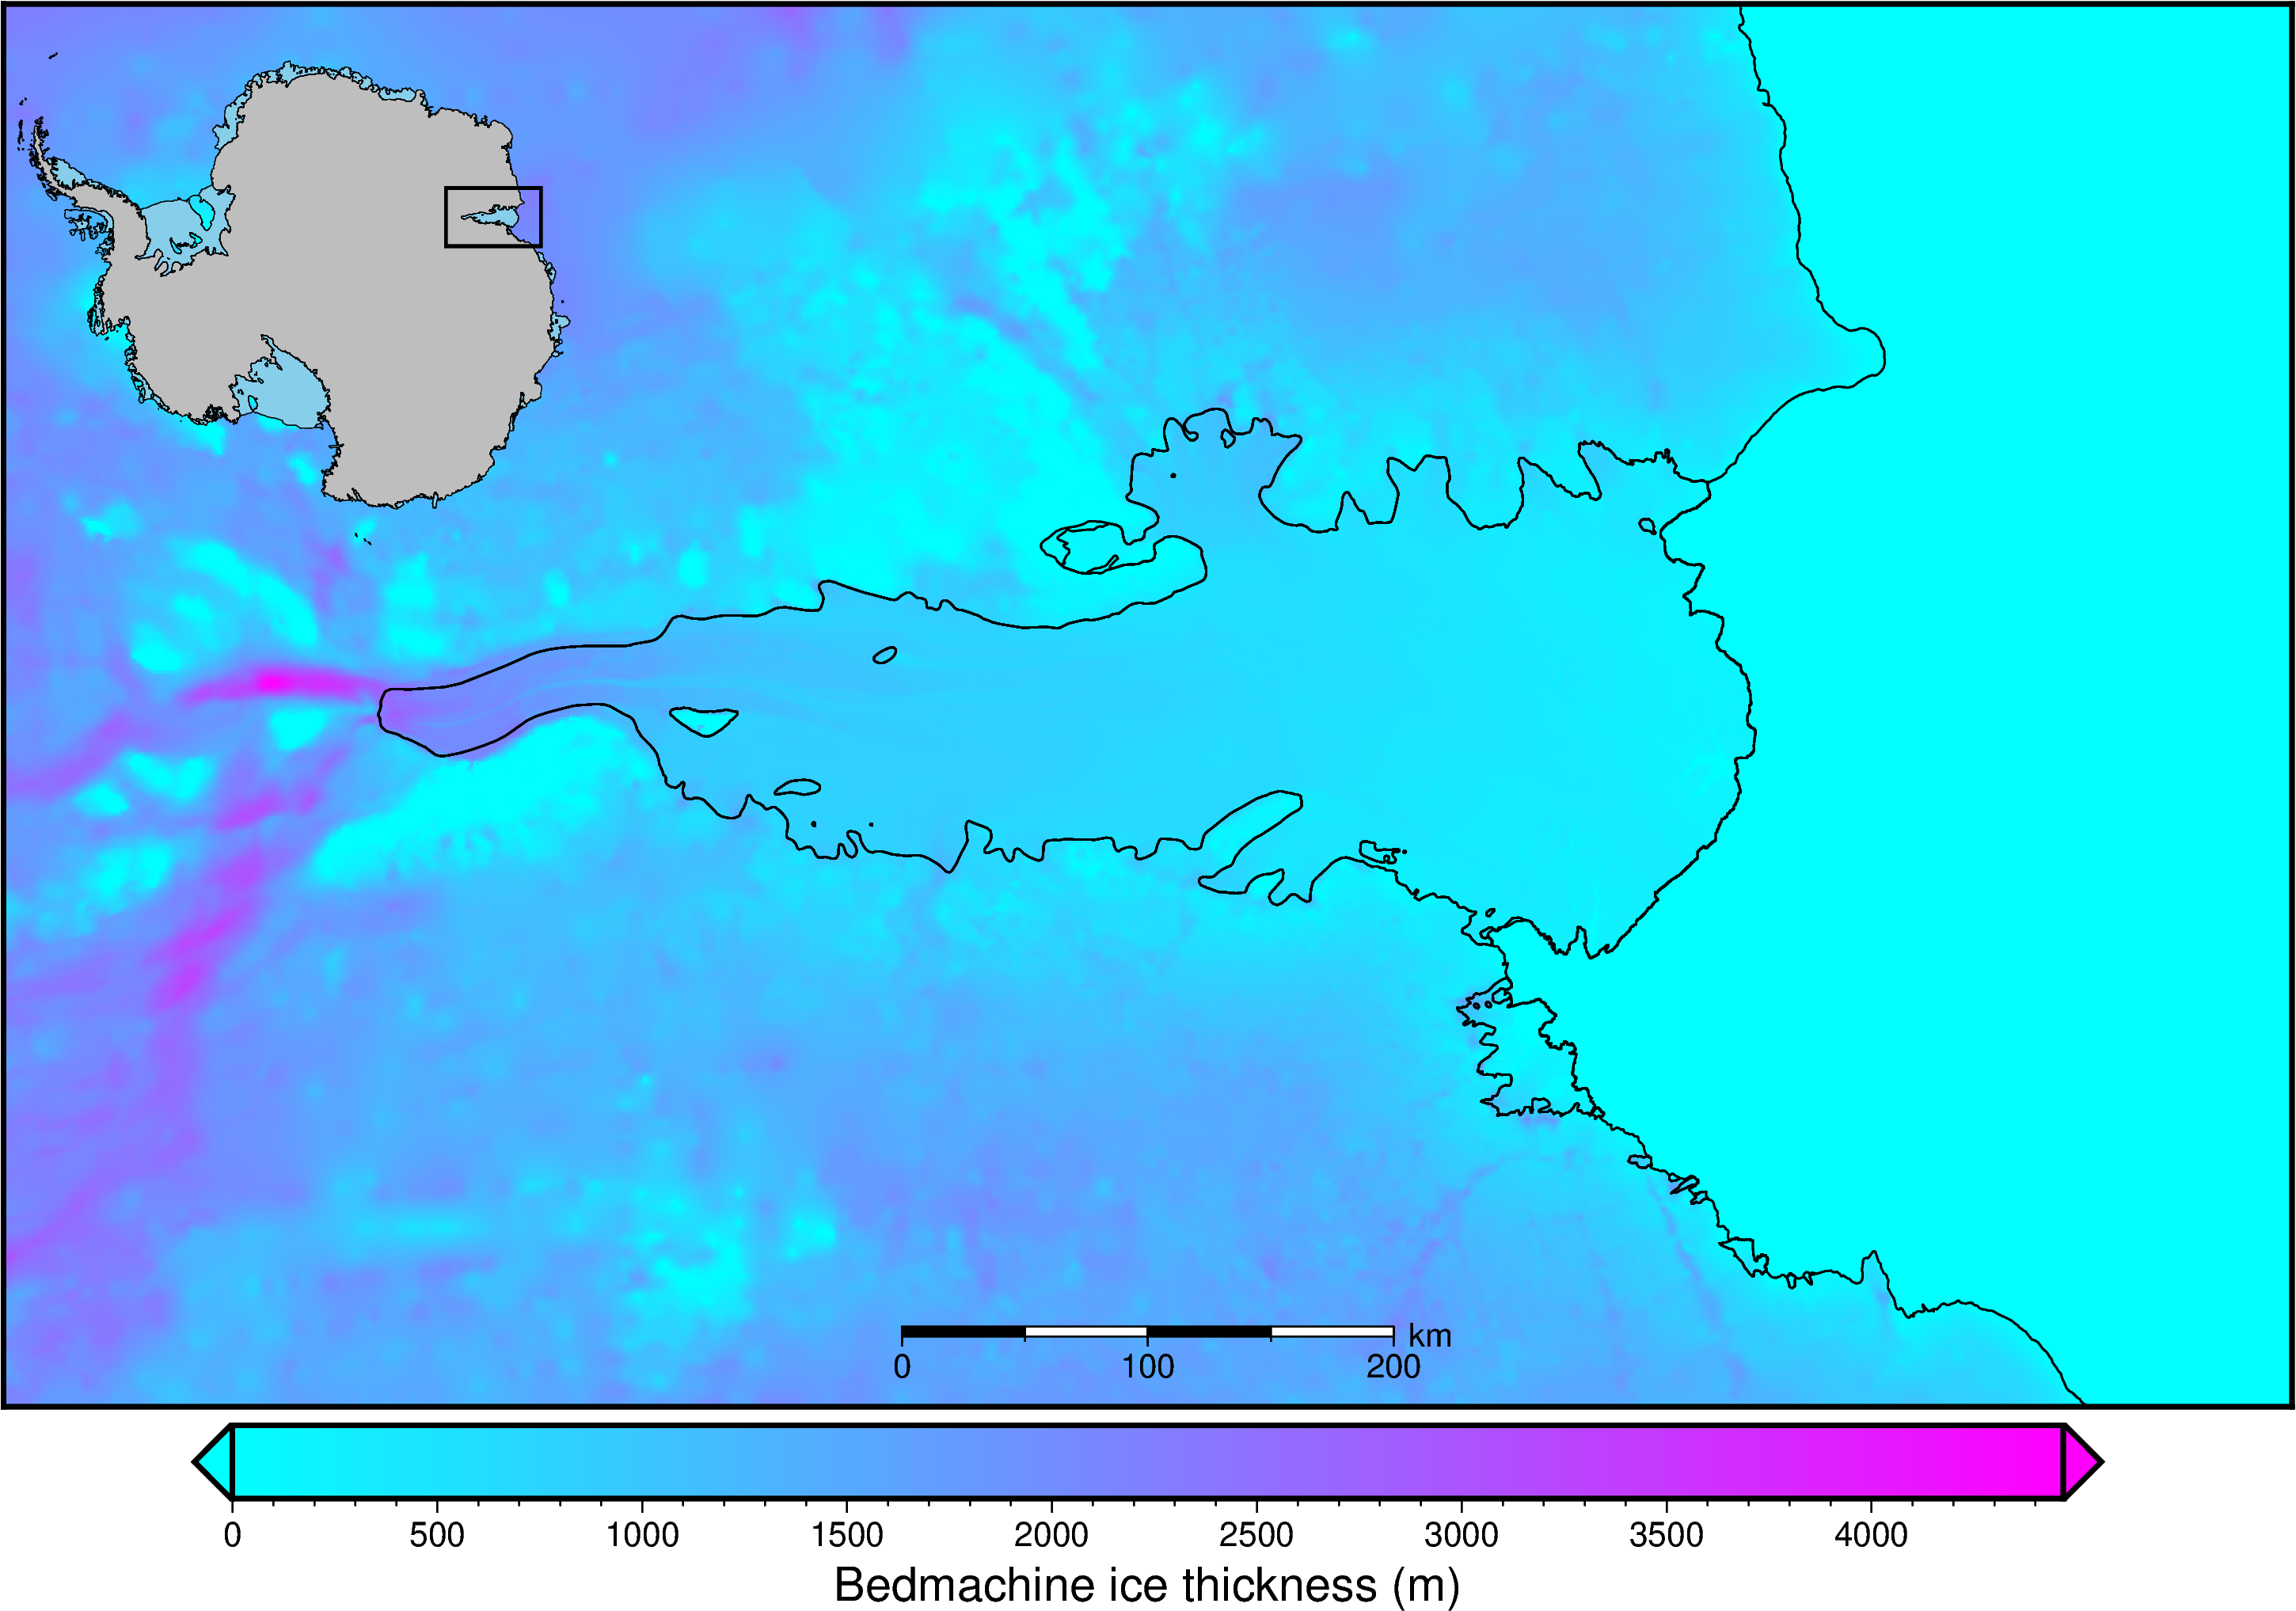

In [3]:
# download
ice_thickness = fetch.bedmachine(
    layer = "thickness",  
    region = regions.amery_ice_shelf, 
    spacing = 1000,  
)

# plot
fig = maps.plot_grd(
    grid = ice_thickness,
    cmap = "cool",
    coast = True,
    cbar_label = "Bedmachine ice thickness (m)",
    inset = True,
    scalebar = True,
)

# show
fig.show()

In [4]:
fig.savefig('basic_map.png')

## Sample data along a profile
First we need to fetch the datasets to sample. By default the function will sample Bedmachine layers for the cross section. We will provide out own datasets to show as data profiles.

In [6]:
# well plot both gravity data and geothermal heat flux data 

gravity = fetch.gravity(type='BA') 

GHF = fetch.geothermal(version='losing-ebbing-2021') 

# add the data and properties to a dictionary
data = profile.make_data_dict(
    ["Bouguer gravity", "Geothermal heat flux"], # titles
    [gravity, GHF], # datasets
    ["blue", "red"], # line colors
)

Next we need to define our profile location. We have 3 options for that.

* Option 1: use two sets of coordinates to define a line
Coordinates are in meters east and north; EPSG3031 Polar Stereographic Projection
If you don't know which coordinates to use, click on a point on the map and copy and paste the output coordinates to variables `a` and `b`.

* Option 2: use a shapefile as the path

* Option 3: click on an interactive map to create a line

In [9]:
# option 1
# coordinates in meters east and north; EPSG3031 Polar Stereographic Projection
a = [437248.0000000149, -902144.0000000305]
b = [121855.99999999959, -1378303.9999999988]
# click on the below map and copy the output coordinates.

# option 2 
# provide your own shapefile, or use fetch to retrieve one
shapefile=fetch.sample_shp("Disco_deep_transect")

# option 3
# use the "Draw a polyline" button on the below map to create a line.
lines = maps.draw_lines()

Label(value='')

Map(center=[-90.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out…

In [12]:
# for option 3, we need to extract the clicked vertices
# extract the vertices of the line
line = utils.shapes_to_df(lines)

Now we can make the cross section plot!

gmtset [WARNING]: Representation of font type not recognized. Using default.


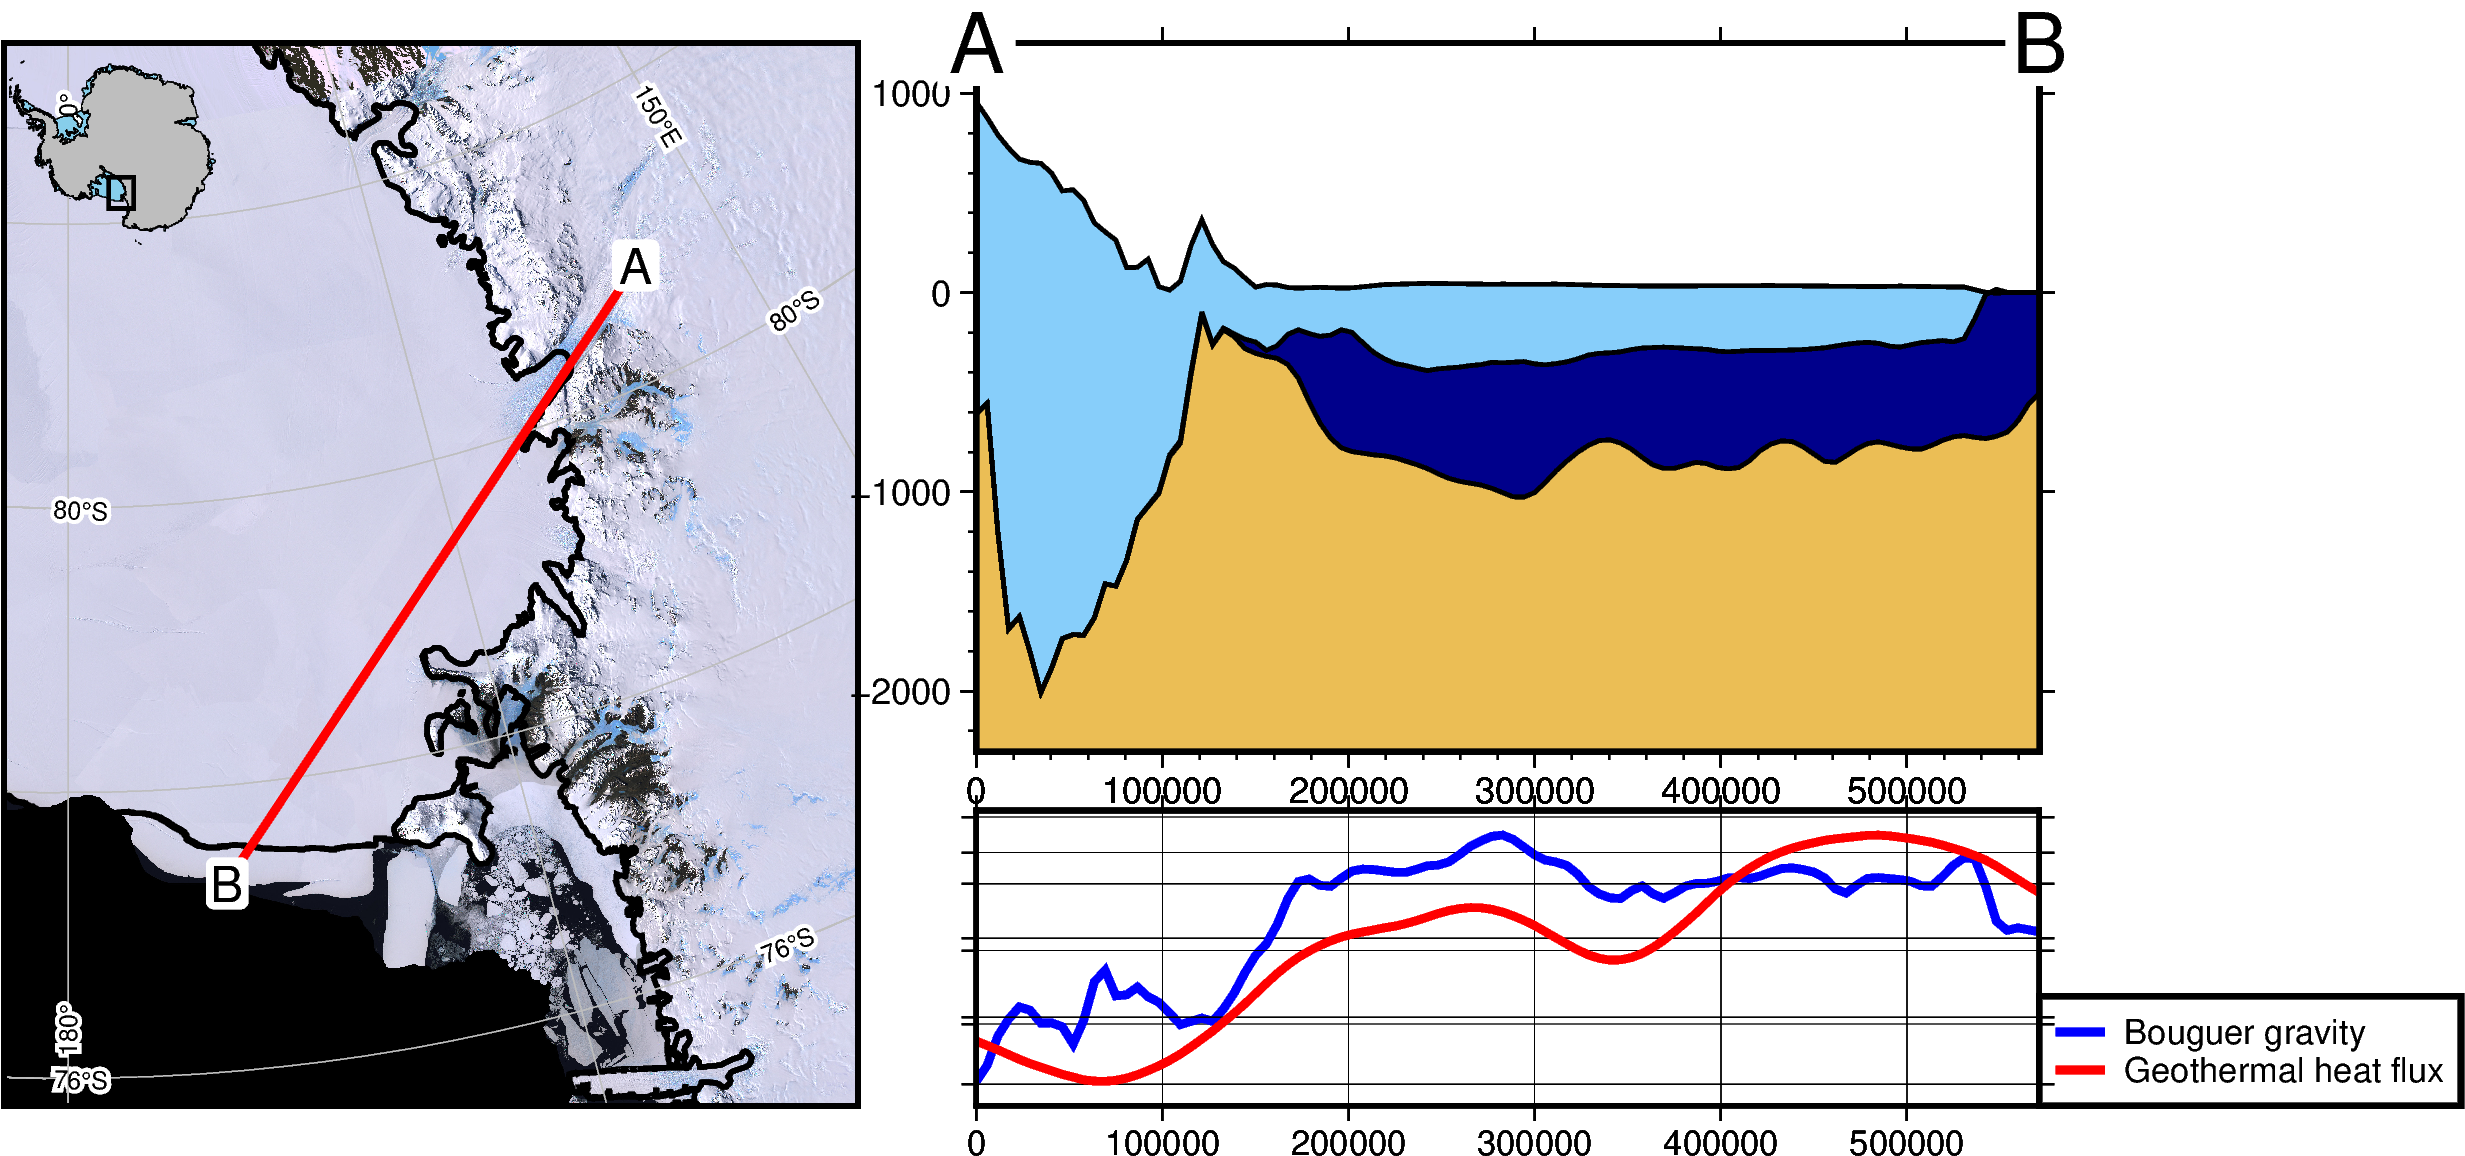

In [10]:
# option 1
# note these can take a minute or two to plot since the imagery file is quite large. add `map_background=fetch.bedmachine("surface"),` for a faster plot
profile.plot_profile(
    method = "points",
    start = a,
    stop = b,
    data_dict = data,
    add_map = True,
)

gmtset [WARNING]: Representation of font type not recognized. Using default.


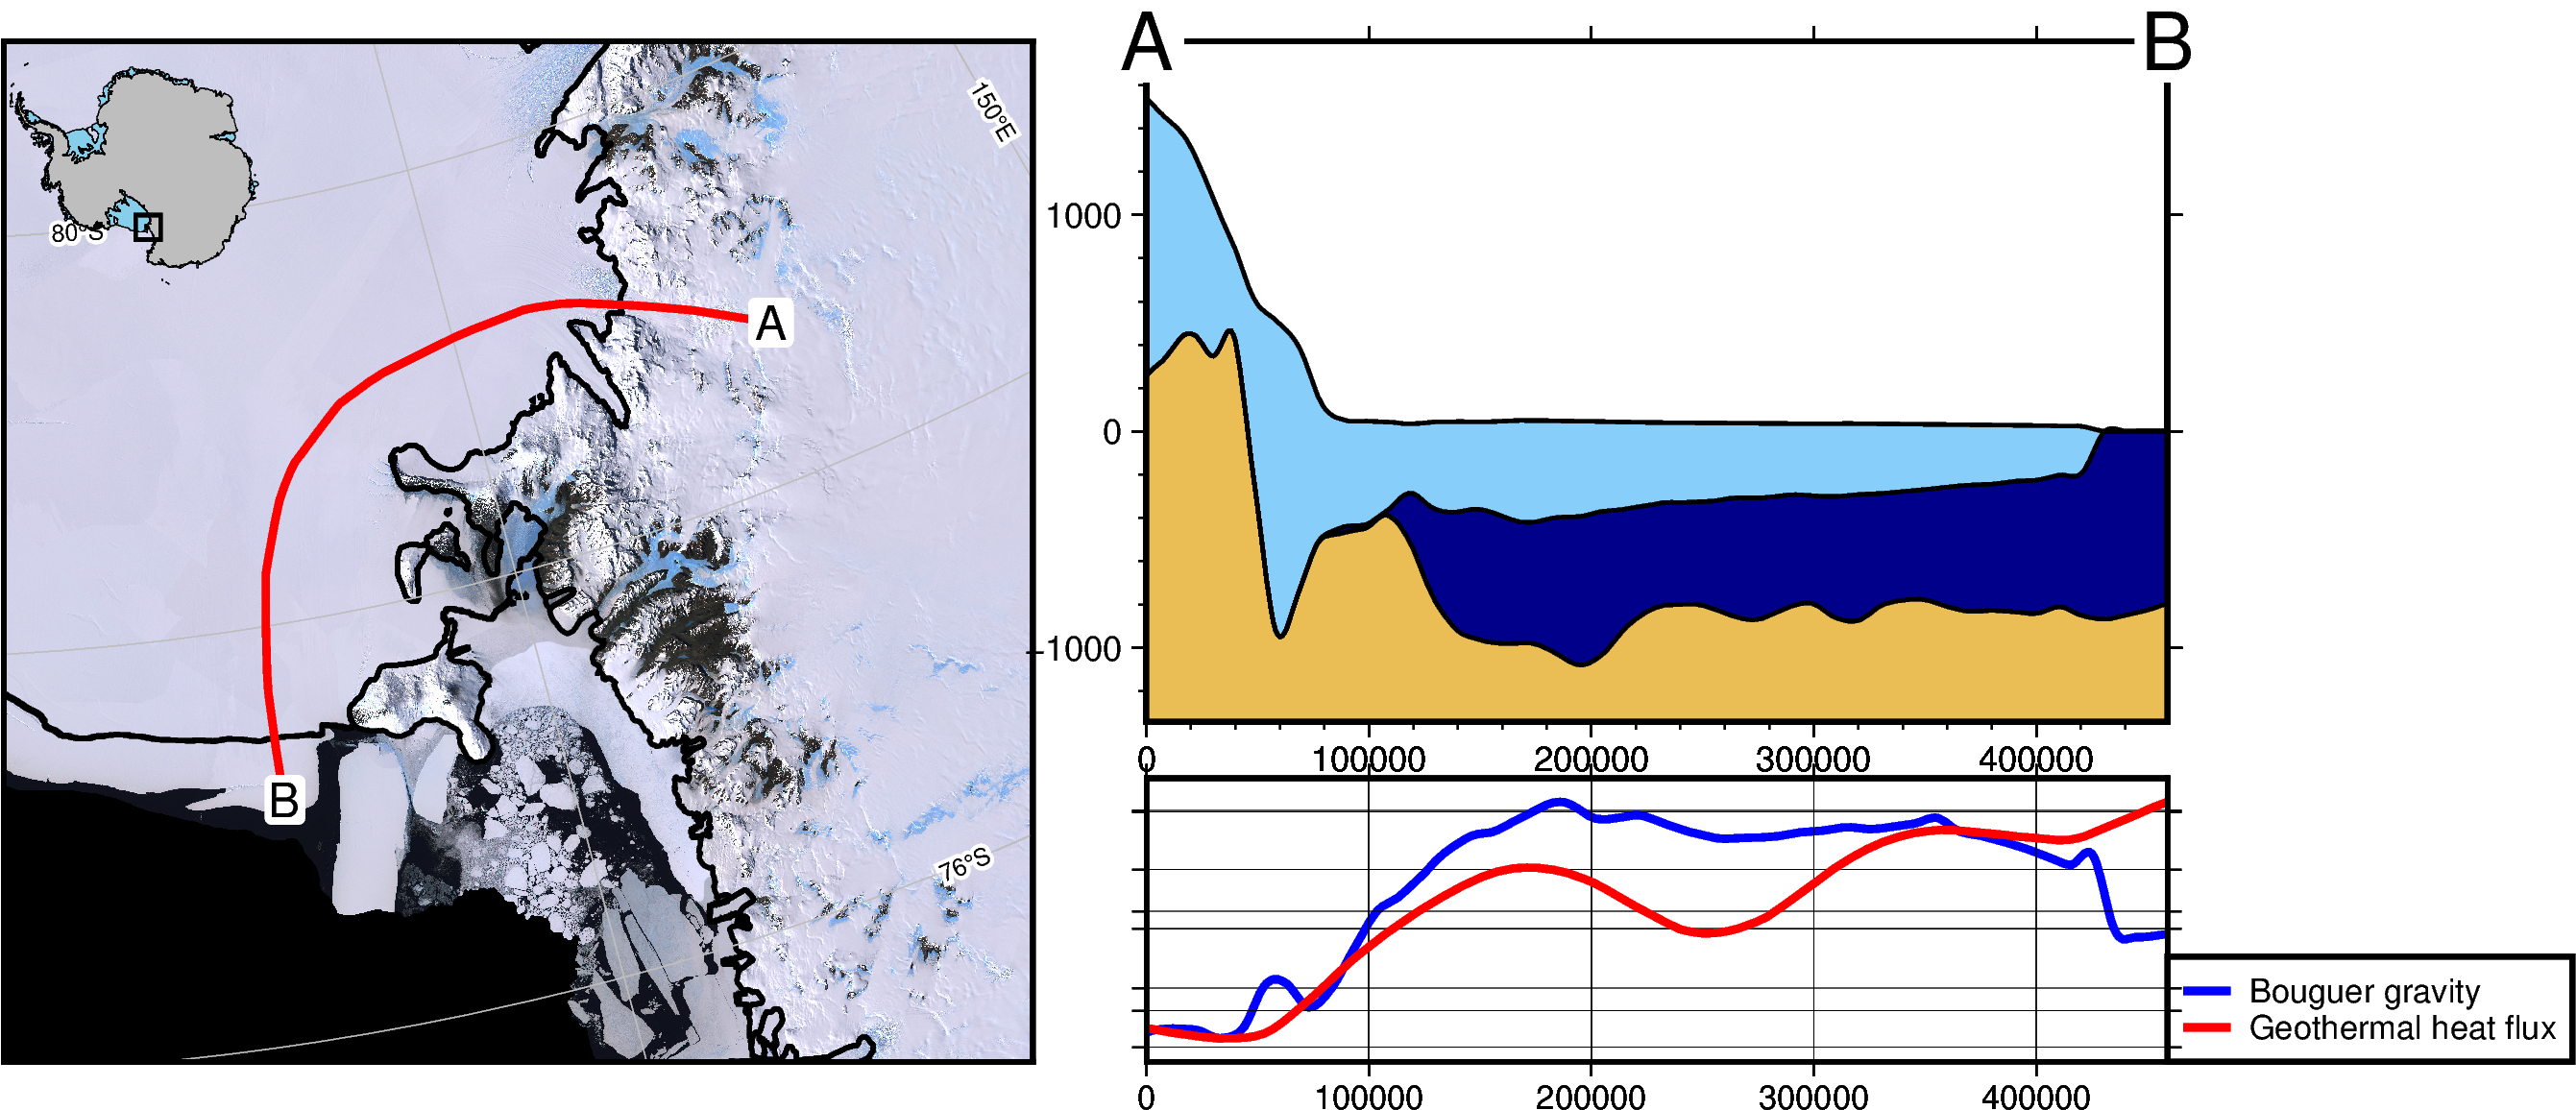

In [11]:
# option 2
profile.plot_profile(
    method = "shapefile",
    shapefile = shapefile,
    data_dict = data,
    add_map = True,
)

gmtset [WARNING]: Representation of font type not recognized. Using default.


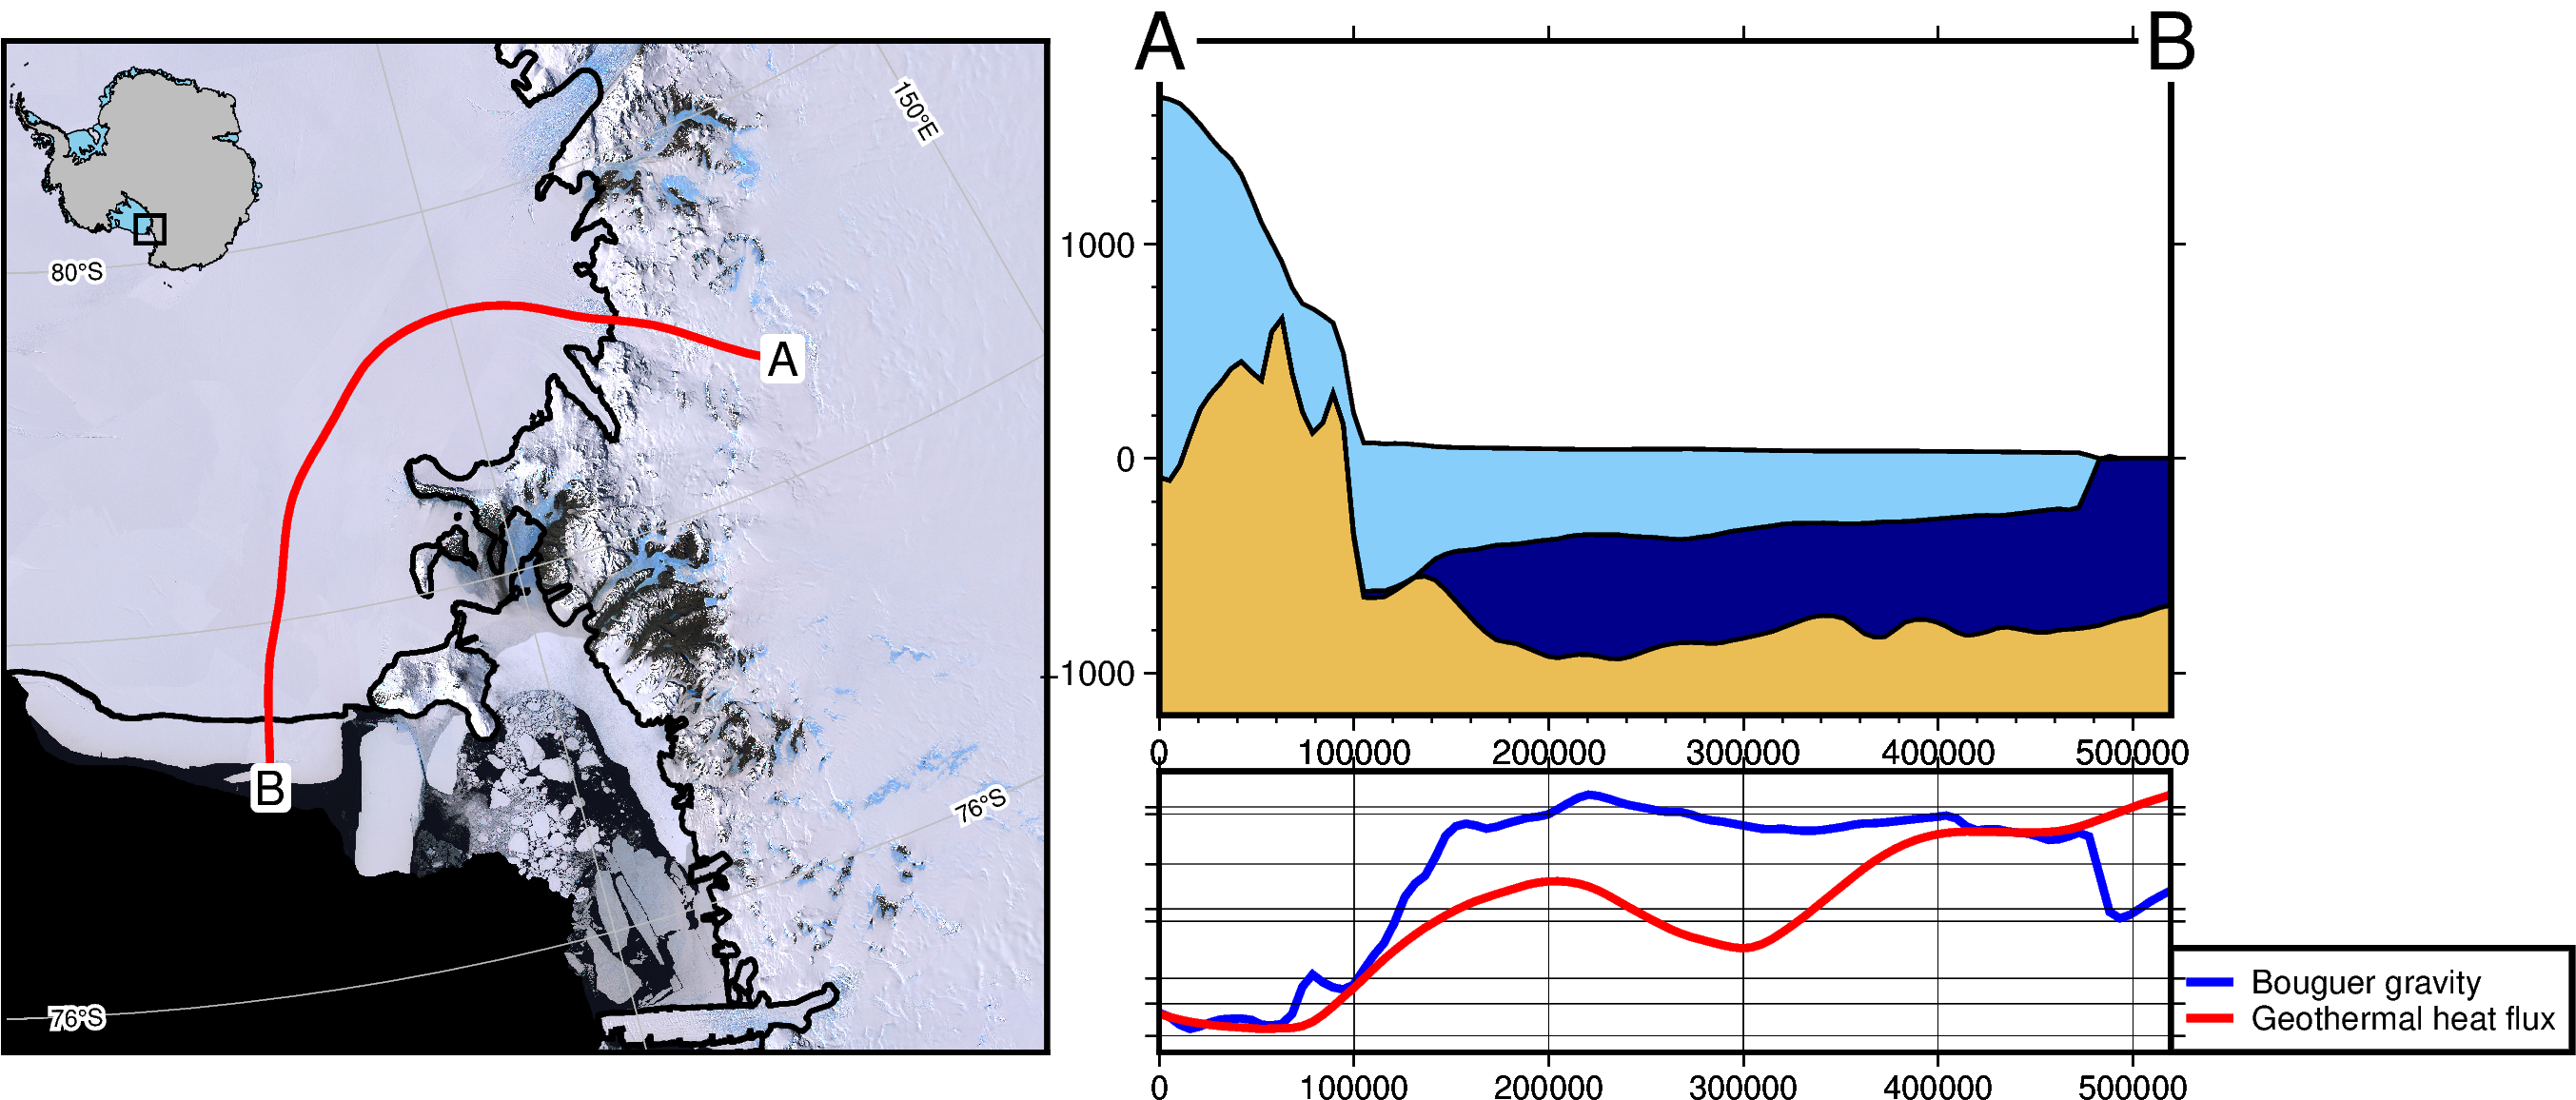

In [14]:
# option 3
profile.plot_profile(
    method = "polyline",
    polyline = line,
    num = 100, # interpolate between clicked points
    data_dict = data,
    add_map = True,
)

Use the below for a quick and simple cross section

In [18]:
lines = maps.draw_lines()

Label(value='')

Map(center=[-90.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out…

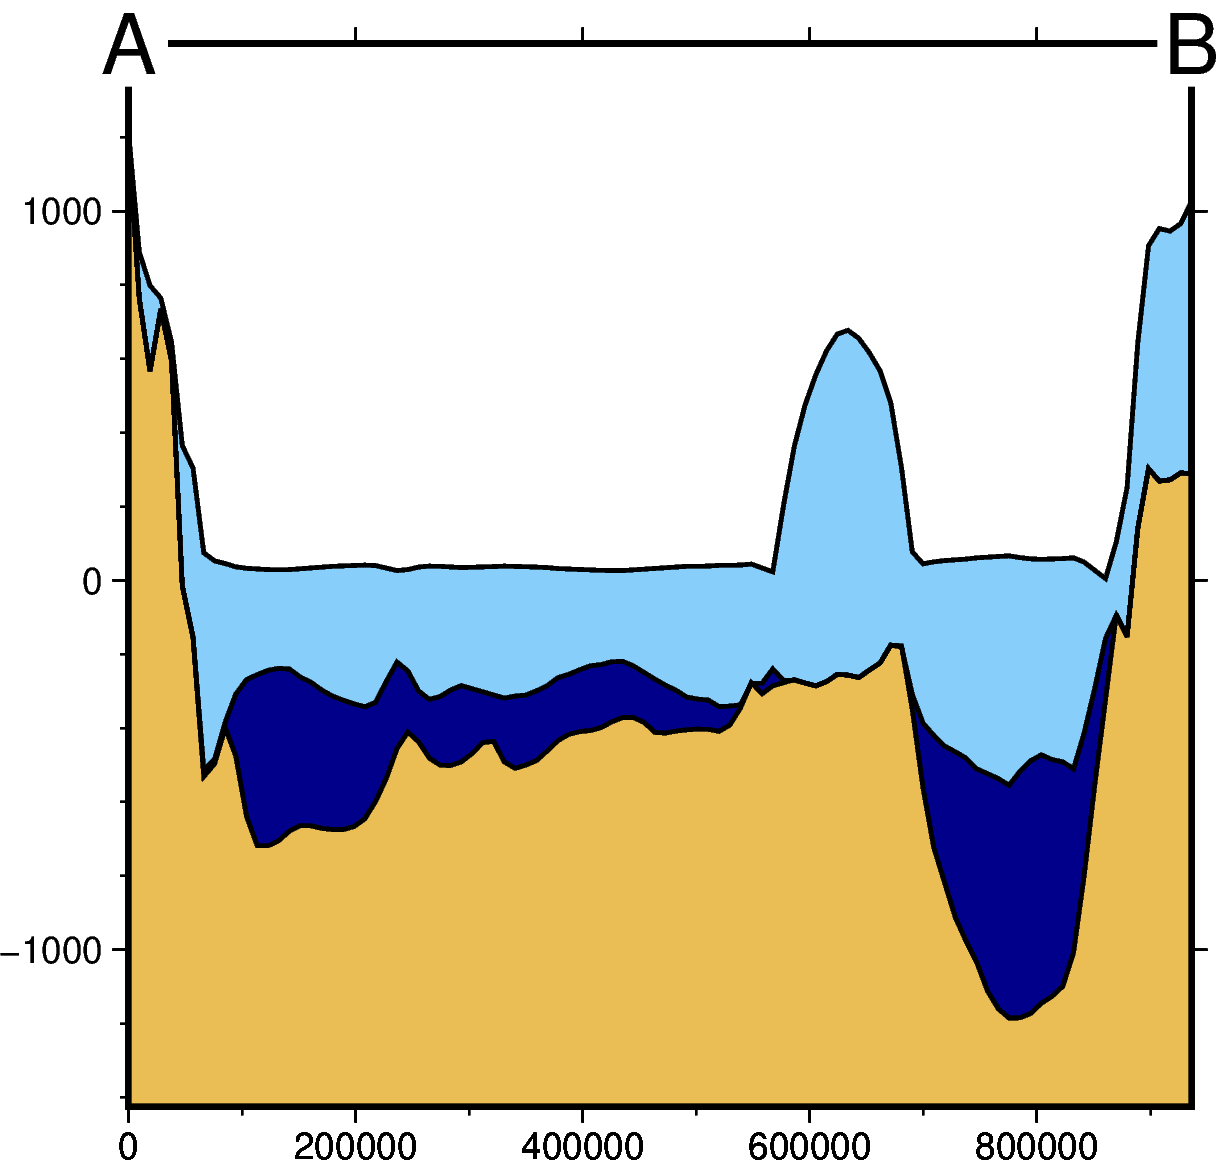

In [19]:
line = utils.shapes_to_df(lines)
profile.plot_profile(
    method = "polyline",
    polyline = line,
    num = 100,
)